In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
dataset = pd.read_csv("/home/negi/Desktop/iris.csv")
print(dataset)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

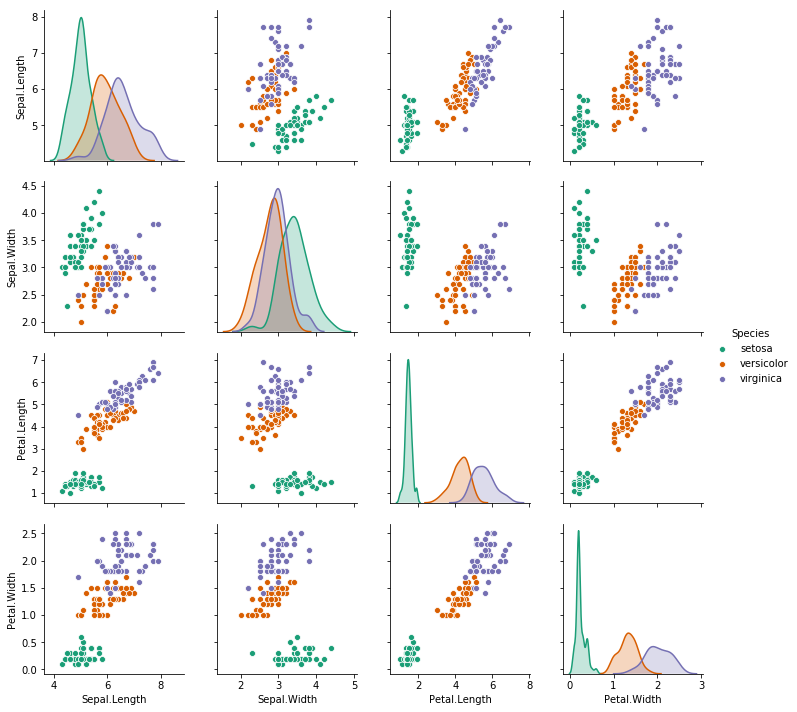

In [10]:
#sns.pairplot(dataset, hue ='Species', palette= 'Set1')
sns.pairplot(dataset, hue ='Species', palette= 'Dark2')

In [11]:
dataset['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = dataset.drop('Species',axis=1)
print(X)
y = dataset['Species']
print(y)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6             4.6          3.4           1.4          0.3
7             5.0          3.4           1.5          0.2
8             4.4          2.9           1.4          0.2
9             4.9          3.1           1.5          0.1
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
16            

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [15]:
from sklearn.tree import DecisionTreeClassifier


In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
predictions = dtree.predict(X_test)


In [19]:
from sklearn.metrics import classification_report,confusion_matrix


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.88      0.94        17

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [21]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 15  0]
 [ 0  2 15]]


In [22]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [23]:
features = list(dataset.columns[:-1])
features

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

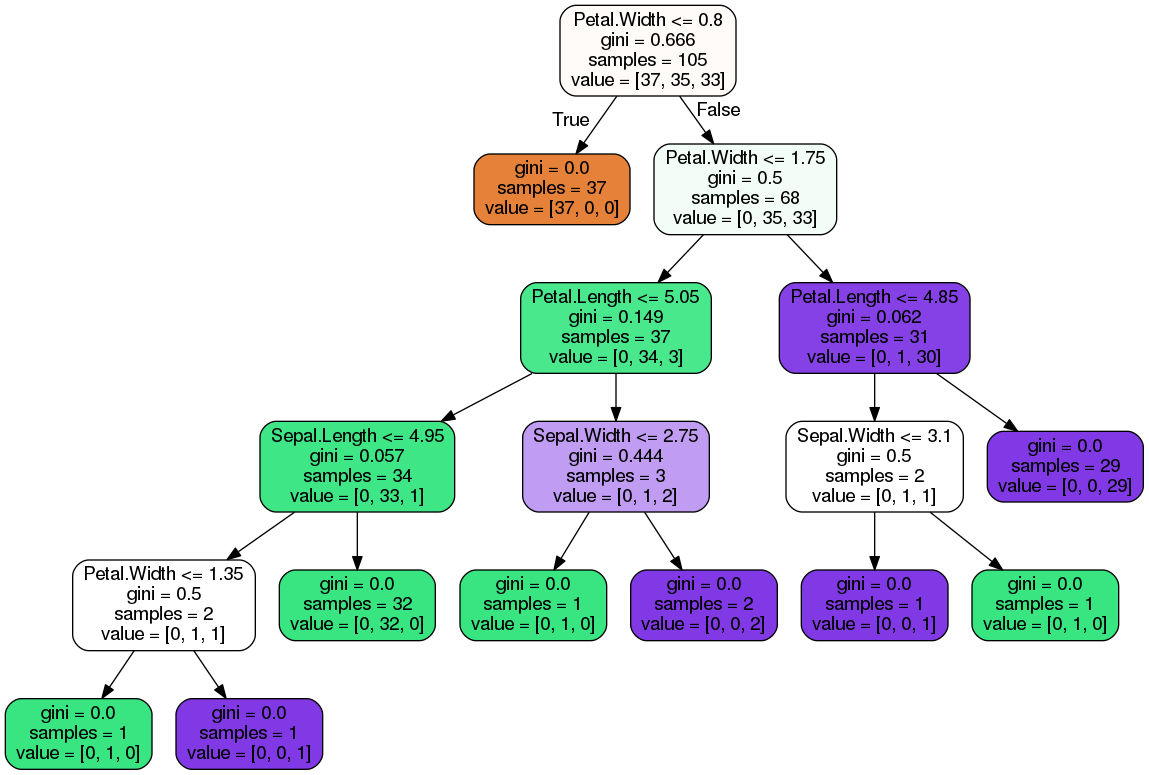

In [24]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  